In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import requests
import json

%pylab inline
font = {'size'   : 18}
plt.rc('font', **font)

Populating the interactive namespace from numpy and matplotlib


In [2]:
headers = {'Content-type': 'application/json'}
p_CPI = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=CPIAUCSL&units=pch&aggregation_method=eop&frequency=a&observation_start=1948-01-01&observation_end=2016-12-31&api_key=dcc02bc21eb3ff77485c273a5bc55b80&file_type=json', headers=headers)
json_data = json.loads(p_CPI.text)

p_RS = requests.get('https://api.stlouisfed.org/fred/series/observations?series_id=RSAFS&aggregation_method=avg&frequency=a&observation_start=1992-01-01&observation_end=2016-12-31&api_key=dcc02bc21eb3ff77485c273a5bc55b80&file_type=json', headers=headers)
json_data2 = json.loads(p_RS.text)

In [3]:
year = []
value = []
for item in json_data['observations']:
    year.append(item['date'])
    value.append(item[u'value'])

column = ['DATE']
CPI_data = pd.DataFrame(year, columns=column)
column = ['CPI']
CPI_data['CPI'] = pd.DataFrame(value, columns=column)

year = []
value = []
for item in json_data2['observations']:
    year.append(item['date'])
    value.append(item[u'value'])

column = ['DATE']
RS_data = pd.DataFrame(year, columns=column)
column = ['TOTAL SALES']
RS_data['TOTAL SALES'] = pd.DataFrame(value, columns=column)

<function matplotlib.pyplot.show>

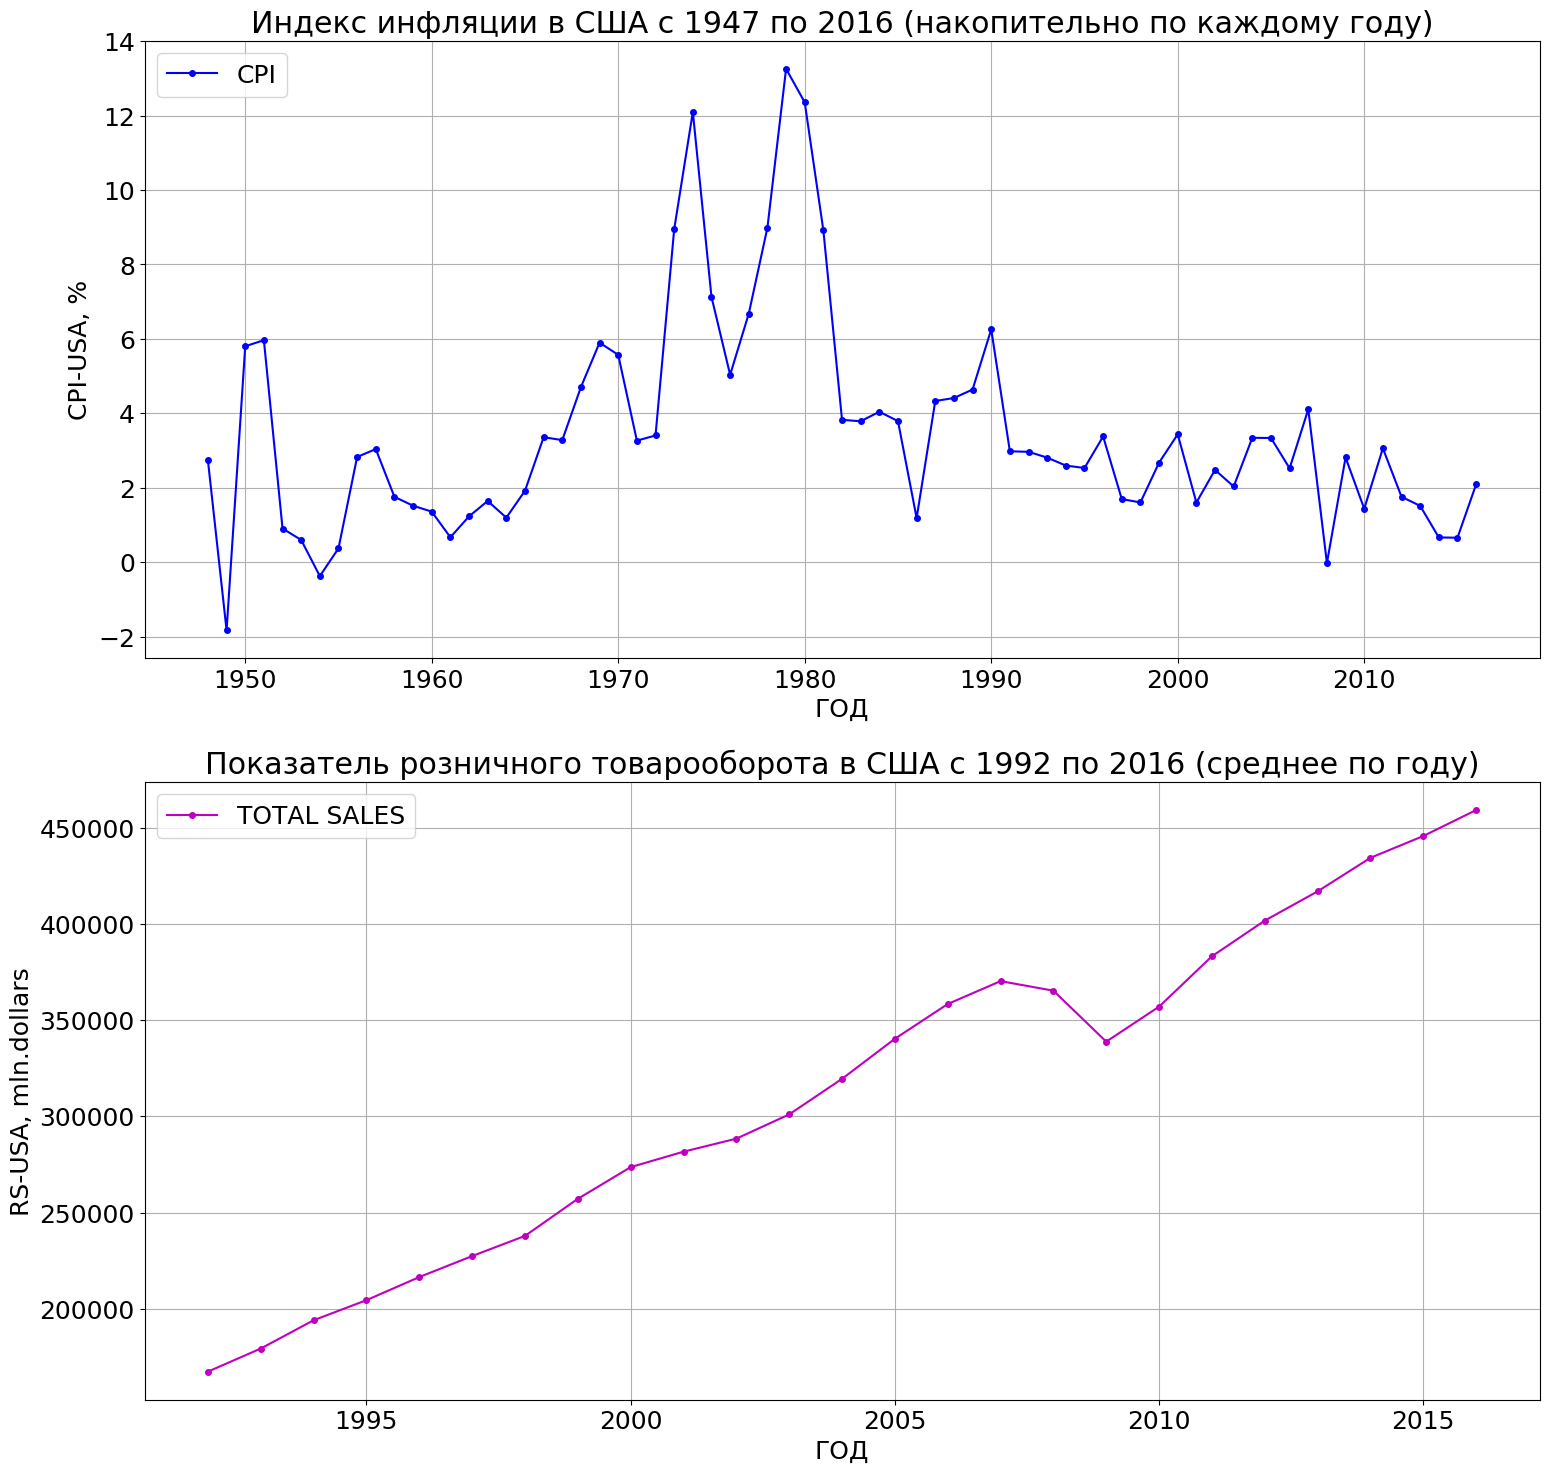

In [6]:
CPI_data['DATE'] = pd.to_datetime(CPI_data['DATE'], format = '%Y.%m.%d')     # преобразовываю дату
CPI_data.rename(columns= {'DATE': u'ДАТА', 'CPIAUCSL_PCH': 'CPI'}, inplace=True)      # переименовываю колонки
CPI_data[u'ГОД'] = [item.timetuple()[0] for item in CPI_data[u'ДАТА']]           # выделяю год

RS_data['DATE'] = pd.to_datetime(RS_data['DATE'], format = '%Y.%m.%d')
RS_data.rename(columns= {'DATE': u'ДАТА', 'RSAFS': 'TOTAL SALES'}, inplace=True)
RS_data[u'ГОД'] = [item.timetuple()[0] for item in RS_data[u'ДАТА']]

fig, ax = plt.subplots(2, 1, figsize = (18, 18), dpi=100)

plt.subplot(2, 1, 1)

plt.plot(CPI_data[u'ГОД'], CPI_data['CPI'], 'k-o', color='blue', markersize=4, label='CPI')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel(u'ГОД')
plt.ylabel('CPI-USA, %')
plt.title(u'Индекс инфляции в США с 1947 по 2016 (накопительно по каждому году)')

plt.subplot(2, 1, 2)
plt.plot(RS_data[u'ГОД'], RS_data['TOTAL SALES'], 'k-o', color='m', markersize=4, label='TOTAL SALES')
plt.legend(loc='upper left')
plt.grid()
plt.xlabel(u'ГОД')
plt.ylabel('RS-USA, mln.dollars')
plt.title(u'Показатель розничного товарооборота в США с 1992 по 2016 (среднее по году)')

plt.show